In [2]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install folium pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Importing the libraries
import folium
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from shapely.geometry import Point

In [13]:
#reading the trip data  from Q1  dataset
df1 = pd.read_csv('/Users/rhythmsehgal/Downloads/MSc BA/Programming in Business Analytics/Assignment/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q1.csv')

In [14]:
#looking first 10 rows of data as sample
df1.head(10)

trip_id          start_time            end_time  bikeid  tripduration  \
0  13518905  3/31/2017 23:59:07   4/1/2017 00:13:24    5292           857   
1  13518904  3/31/2017 23:56:25   4/1/2017 00:00:21    4408           236   
2  13518903  3/31/2017 23:55:33   4/1/2017 00:01:21     696           348   
3  13518902  3/31/2017 23:54:46  3/31/2017 23:59:34    4915           288   
4  13518901  3/31/2017 23:53:33   4/1/2017 00:00:28    4247           415   
5  13518900  3/31/2017 23:51:17  3/31/2017 23:55:19    3536           242   
6  13518899  3/31/2017 23:51:16  3/31/2017 23:57:17    5111           361   
7  13518898  3/31/2017 23:50:26  3/31/2017 23:56:20    1579           354   
8  13518897  3/31/2017 23:50:25  3/31/2017 23:55:24    3914           299   
9  13518896  3/31/2017 23:49:58   4/1/2017 00:09:31    5455          1173   

   from_station_id            from_station_name  to_station_id  \
0               66         Clinton St & Lake St            171   
1              199       Wabash Ave & Grand Ave             26   
2              520   Greenview Ave & Jarvis Ave            432   
3              110        Dearborn St & Erie St            142   
4              327  Sheffield Ave & Webster Ave            331   
5              143    Sedgwick St & Webster Ave            289   
6               81           Daley Center Plaza             41   
7               56    Desplaines St & Kinzie St             77   
8              210    Ashland Ave & Division St             69   
9              117     Wilton Ave & Belmont Ave             29   

                 to_station_name    usertype  gender  birthyear  
0          May St & Cullerton St  Subscriber    Male     1989.0  
1       McClurg Ct & Illinois St  Subscriber    Male     1990.0  
2            Clark St & Lunt Ave  Subscriber  Female     1979.0  
3           McClurg Ct & Erie St  Subscriber    Male     1985.0  
4  Halsted St & Blackhawk St (*)  Subscriber  Female     1989.0  
5          Wells St & Concord Ln  Subscriber    Male     1988.0  
6           Federal St & Polk St  Subscriber    Male     1987.0  
7        Clinton St & Madison St  Subscriber    Male     1981.0  
8         Damen Ave & Pierce Ave  Subscriber    Male     1992.0  
9       Noble St & Milwaukee Ave  Subscriber    Male     1989.0

In [15]:
#looking last 10 rows of data as sample
df1.tail(10)

trip_id         start_time           end_time  bikeid  tripduration  \
431681  12979239  1/1/2017 00:17:01  1/1/2017 00:29:49    5258           768   
431682  12979238  1/1/2017 00:15:03  1/1/2017 00:26:28    2220           685   
431683  12979237  1/1/2017 00:14:57  1/1/2017 00:26:22    4282           685   
431684  12979236  1/1/2017 00:11:34  1/1/2017 00:23:47    1145           733   
431685  12979235  1/1/2017 00:10:44  1/1/2017 00:21:27     670           643   
431686  12979234  1/1/2017 00:07:57  1/1/2017 00:20:53    2209           776   
431687  12979233  1/1/2017 00:07:28  1/1/2017 00:12:51    5637           323   
431688  12979232  1/1/2017 00:06:06  1/1/2017 00:18:31    4992           745   
431689  12979231  1/1/2017 00:02:54  1/1/2017 00:08:21    3660           327   
431690  12979230  1/1/2017 00:00:36  1/1/2017 00:06:32    2511           356   

        from_station_id                     from_station_name  to_station_id  \
431681               60                 Dayton St & North Ave             54   
431682               81                    Daley Center Plaza            191   
431683               81                    Daley Center Plaza            191   
431684              194                Wabash Ave & Wacker Pl             68   
431685               47                  State St & Kinzie St            175   
431686              300                  Broadway & Barry Ave            118   
431687              287               Franklin St & Monroe St             68   
431688              620  Orleans St & Chestnut St (NEXT Apts)            333   
431689               28            Larrabee St & Menomonee St             20   
431690              414                  Canal St & Taylor St            191   

                     to_station_name    usertype gender  birthyear  
431681       Ogden Ave & Chicago Ave    Customer    NaN        NaN  
431682      Canal St & Monroe St (*)    Customer    NaN        NaN  
431683      Canal St & Monroe St (*)    Customer    NaN        NaN  
431684        Clinton St & Tilden St  Subscriber   Male     1986.0  
431685            Wells St & Polk St  Subscriber   Male     1970.0  
431686       Sedgwick St & North Ave  Subscriber   Male     1990.0  
431687        Clinton St & Tilden St  Subscriber   Male     1990.0  
431688    Ashland Ave & Blackhawk St  Subscriber   Male     1985.0  
431689  Sheffield Ave & Kingsbury St  Subscriber   Male     1984.0  
431690      Canal St & Monroe St (*)    Customer    NaN        NaN

In [16]:
#checking the count of rows and columns of Q1 dataset
df1.shape

(431691, 12)

In [17]:
#reading the trip data from Q2 dataset
df2 = pd.read_csv('/Users/rhythmsehgal/Downloads/MSc BA/Programming in Business Analytics/Assignment/Divvy_Trips_2017_Q1Q2/Divvy_Trips_2017_Q2.csv')

In [18]:
#looking first 10 rows of data as sample
df2.head(10)

trip_id          start_time           end_time  bikeid  tripduration  \
0  14853213  6/30/2017 23:59:51  7/1/2017 00:13:57     893           846   
1  14853212  6/30/2017 23:59:28  7/1/2017 00:07:10    1909           462   
2  14853210  6/30/2017 23:59:18  7/1/2017 00:04:58    2071           340   
3  14853209  6/30/2017 23:59:14  7/1/2017 00:06:21     101           427   
4  14853208  6/30/2017 23:59:01  7/1/2017 00:08:41      47           580   
5  14853206  6/30/2017 23:58:21  7/1/2017 00:04:24     973           363   
6  14853205  6/30/2017 23:58:19  7/1/2017 00:03:41     181           322   
7  14853204  6/30/2017 23:58:13  7/1/2017 00:24:22     829          1569   
8  14853203  6/30/2017 23:56:48  7/1/2017 00:00:07    3376           199   
9  14853202  6/30/2017 23:56:20  7/1/2017 01:16:50    2712          4830   

   from_station_id              from_station_name  to_station_id  \
0              107   Desplaines St & Jackson Blvd             56   
1              165            Clark St & Grace St            234   
2              327    Sheffield Ave & Webster Ave            327   
3              192            Canal St & Adams St             40   
4              130        Damen Ave & Division St            331   
5              313  Lakeview Ave & Fullerton Pkwy            157   
6              313  Lakeview Ave & Fullerton Pkwy            127   
7              307   Southport Ave & Clybourn Ave            506   
8              261        Hermitage Ave & Polk St            320   
9                6                 Dusable Harbor             35   

                  to_station_name    usertype  gender  birthyear  
0       Desplaines St & Kinzie St  Subscriber    Male     1975.0  
1         Clark St & Montrose Ave  Subscriber  Female     1968.0  
2     Sheffield Ave & Webster Ave  Subscriber  Female     1996.0  
3           LaSalle St & Adams St  Subscriber    Male     1980.0  
4   Halsted St & Blackhawk St (*)  Subscriber    Male     1990.0  
5  Lake Shore Dr & Wellington Ave  Subscriber    Male     1990.0  
6     Lincoln Ave & Fullerton Ave  Subscriber    Male     1992.0  
7    Spaulding Ave & Armitage Ave  Subscriber  Female     1989.0  
8        Loomis St & Lexington St  Subscriber    Male     1988.0  
9         Streeter Dr & Grand Ave    Customer     NaN        NaN

In [19]:
#looking at last 10 rows of data as sample
df2.tail(10)

trip_id         start_time           end_time  bikeid  tripduration  \
1119804  13518915  4/1/2017 00:10:55  4/1/2017 00:17:38    4391           403   
1119805  13518914  4/1/2017 00:10:55  4/1/2017 00:16:26    3914           331   
1119806  13518913  4/1/2017 00:10:17  4/1/2017 00:21:01    3263           644   
1119807  13518912  4/1/2017 00:09:03  4/1/2017 00:13:53    4173           290   
1119808  13518911  4/1/2017 00:06:48  4/1/2017 00:21:09    1082           861   
1119809  13518910  4/1/2017 00:06:30  4/1/2017 00:11:56    1796           326   
1119810  13518909  4/1/2017 00:06:00  4/1/2017 00:20:53      22           893   
1119811  13518908  4/1/2017 00:04:13  4/1/2017 00:19:20    1296           907   
1119812  13518907  4/1/2017 00:03:08  4/1/2017 00:08:24    2695           316   
1119813  13518906  4/1/2017 00:01:35  4/1/2017 00:14:30    4596           775   

         from_station_id                    from_station_name  to_station_id  \
1119804               47                 State St & Kinzie St             56   
1119805               69               Damen Ave & Pierce Ave            333   
1119806              289                Wells St & Concord Ln            324   
1119807               99              Lake Shore Dr & Ohio St              6   
1119808              100  Orleans St & Merchandise Mart Plaza              2   
1119809              296               Broadway & Belmont Ave            232   
1119810              199               Wabash Ave & Grand Ave             68   
1119811               56            Desplaines St & Kinzie St             69   
1119812              332           Halsted St & Diversey Pkwy            226   
1119813               52               Michigan Ave & Lake St            284   

                       to_station_name    usertype gender  birthyear  
1119804      Desplaines St & Kinzie St  Subscriber   Male     1975.0  
1119805     Ashland Ave & Blackhawk St  Subscriber   Male     1992.0  
1119806   Stockton Dr & Wrightwood Ave  Subscriber   Male     1992.0  
1119807                 Dusable Harbor  Subscriber   Male     1982.0  
1119808            Buckingham Fountain  Subscriber   Male     1990.0  
1119809  Pine Grove Ave & Waveland Ave  Subscriber   Male     1960.0  
1119810         Clinton St & Tilden St  Subscriber   Male     1979.0  
1119811         Damen Ave & Pierce Ave  Subscriber   Male     1993.0  
1119812       Racine Ave & Belmont Ave  Subscriber   Male     1986.0  
1119813    Michigan Ave & Jackson Blvd  Subscriber   Male     1987.0

In [20]:
#checking the count of rows and columns from Q2 dataset
df2.shape

(1119814, 12)

In [21]:
#concatenate the trip data set of Q1 and Q2 into one dataset using concat. Number of columns and names of columns are same for both the dataset
df3 = pd.concat([df1, df2], ignore_index=True)
df3

trip_id          start_time            end_time  bikeid  \
0        13518905  3/31/2017 23:59:07   4/1/2017 00:13:24    5292   
1        13518904  3/31/2017 23:56:25   4/1/2017 00:00:21    4408   
2        13518903  3/31/2017 23:55:33   4/1/2017 00:01:21     696   
3        13518902  3/31/2017 23:54:46  3/31/2017 23:59:34    4915   
4        13518901  3/31/2017 23:53:33   4/1/2017 00:00:28    4247   
...           ...                 ...                 ...     ...   
1551500  13518910   4/1/2017 00:06:30   4/1/2017 00:11:56    1796   
1551501  13518909   4/1/2017 00:06:00   4/1/2017 00:20:53      22   
1551502  13518908   4/1/2017 00:04:13   4/1/2017 00:19:20    1296   
1551503  13518907   4/1/2017 00:03:08   4/1/2017 00:08:24    2695   
1551504  13518906   4/1/2017 00:01:35   4/1/2017 00:14:30    4596   

         tripduration  from_station_id            from_station_name  \
0                 857               66         Clinton St & Lake St   
1                 236              199       Wabash Ave & Grand Ave   
2                 348              520   Greenview Ave & Jarvis Ave   
3                 288              110        Dearborn St & Erie St   
4                 415              327  Sheffield Ave & Webster Ave   
...               ...              ...                          ...   
1551500           326              296       Broadway & Belmont Ave   
1551501           893              199       Wabash Ave & Grand Ave   
1551502           907               56    Desplaines St & Kinzie St   
1551503           316              332   Halsted St & Diversey Pkwy   
1551504           775               52       Michigan Ave & Lake St   

         to_station_id                to_station_name    usertype  gender  \
0                  171          May St & Cullerton St  Subscriber    Male   
1                   26       McClurg Ct & Illinois St  Subscriber    Male   
2                  432            Clark St & Lunt Ave  Subscriber  Female   
3                  142           McClurg Ct & Erie St  Subscriber    Male   
4                  331  Halsted St & Blackhawk St (*)  Subscriber  Female   
...                ...                            ...         ...     ...   
1551500            232  Pine Grove Ave & Waveland Ave  Subscriber    Male   
1551501             68         Clinton St & Tilden St  Subscriber    Male   
1551502             69         Damen Ave & Pierce Ave  Subscriber    Male   
1551503            226       Racine Ave & Belmont Ave  Subscriber    Male   
1551504            284    Michigan Ave & Jackson Blvd  Subscriber    Male   

         birthyear  
0           1989.0  
1           1990.0  
2           1979.0  
3           1985.0  
4           1989.0  
...            ...  
1551500     1960.0  
1551501     1979.0  
1551502     1993.0  
1551503     1986.0  
1551504     1987.0  

[1551505 rows x 12 columns]

In [22]:
#checking the top rows of concaenated q1q2 dataset as sample
df3.head()

trip_id          start_time            end_time  bikeid  tripduration  \
0  13518905  3/31/2017 23:59:07   4/1/2017 00:13:24    5292           857   
1  13518904  3/31/2017 23:56:25   4/1/2017 00:00:21    4408           236   
2  13518903  3/31/2017 23:55:33   4/1/2017 00:01:21     696           348   
3  13518902  3/31/2017 23:54:46  3/31/2017 23:59:34    4915           288   
4  13518901  3/31/2017 23:53:33   4/1/2017 00:00:28    4247           415   

   from_station_id            from_station_name  to_station_id  \
0               66         Clinton St & Lake St            171   
1              199       Wabash Ave & Grand Ave             26   
2              520   Greenview Ave & Jarvis Ave            432   
3              110        Dearborn St & Erie St            142   
4              327  Sheffield Ave & Webster Ave            331   

                 to_station_name    usertype  gender  birthyear  
0          May St & Cullerton St  Subscriber    Male     1989.0  
1       McClurg Ct & Illinois St  Subscriber    Male     1990.0  
2            Clark St & Lunt Ave  Subscriber  Female     1979.0  
3           McClurg Ct & Erie St  Subscriber    Male     1985.0  
4  Halsted St & Blackhawk St (*)  Subscriber  Female     1989.0

In [23]:
#looking at last rows of data as sample
df3.tail()

trip_id         start_time           end_time  bikeid  tripduration  \
1551500  13518910  4/1/2017 00:06:30  4/1/2017 00:11:56    1796           326   
1551501  13518909  4/1/2017 00:06:00  4/1/2017 00:20:53      22           893   
1551502  13518908  4/1/2017 00:04:13  4/1/2017 00:19:20    1296           907   
1551503  13518907  4/1/2017 00:03:08  4/1/2017 00:08:24    2695           316   
1551504  13518906  4/1/2017 00:01:35  4/1/2017 00:14:30    4596           775   

         from_station_id           from_station_name  to_station_id  \
1551500              296      Broadway & Belmont Ave            232   
1551501              199      Wabash Ave & Grand Ave             68   
1551502               56   Desplaines St & Kinzie St             69   
1551503              332  Halsted St & Diversey Pkwy            226   
1551504               52      Michigan Ave & Lake St            284   

                       to_station_name    usertype gender  birthyear  
1551500  Pine Grove Ave & Waveland Ave  Subscriber   Male     1960.0  
1551501         Clinton St & Tilden St  Subscriber   Male     1979.0  
1551502         Damen Ave & Pierce Ave  Subscriber   Male     1993.0  
1551503       Racine Ave & Belmont Ave  Subscriber   Male     1986.0  
1551504    Michigan Ave & Jackson Blvd  Subscriber   Male     1987.0

In [24]:
#looking out for the total number of rows and columns
df3.shape

(1551505, 12)

In [25]:
#looking for missing values
df3.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               316867
birthyear            316683
dtype: int64

In [26]:
#Get the records of missing values in gender column
df3[df3.gender.isnull()]

trip_id          start_time            end_time  bikeid  \
32       13518872  3/31/2017 23:19:53  3/31/2017 23:34:08    3237   
56       13518848  3/31/2017 22:53:31  3/31/2017 23:15:14     242   
59       13518845  3/31/2017 22:52:18  3/31/2017 23:15:14     182   
61       13518843  3/31/2017 22:52:02  3/31/2017 23:07:14    5453   
63       13518841  3/31/2017 22:51:56  3/31/2017 23:07:14    1752   
...           ...                 ...                 ...     ...   
1551426  13518986   4/1/2017 01:29:36   4/1/2017 01:54:09    5371   
1551446  13518966   4/1/2017 01:08:47   4/1/2017 01:28:01    1799   
1551447  13518965   4/1/2017 01:08:40   4/1/2017 01:27:38    4645   
1551448  13518964   4/1/2017 01:07:49   4/1/2017 01:27:36    2411   
1551462  13518950   4/1/2017 00:44:42   4/1/2017 00:53:52     947   

         tripduration  from_station_id             from_station_name  \
32                855              210     Ashland Ave & Division St   
56               1303               81            Daley Center Plaza   
59               1376               81            Daley Center Plaza   
61                912                2           Buckingham Fountain   
63                918                2           Buckingham Fountain   
...               ...              ...                           ...   
1551426          1473               90               Millennium Park   
1551446          1154               45  Michigan Ave & Congress Pkwy   
1551447          1138               45  Michigan Ave & Congress Pkwy   
1551448          1187               45  Michigan Ave & Congress Pkwy   
1551462           550              324  Stockton Dr & Wrightwood Ave   

         to_station_id               to_station_name  usertype gender  \
32                  77       Clinton St & Madison St  Customer    NaN   
56                 172            Rush St & Cedar St  Customer    NaN   
59                 172            Rush St & Cedar St  Customer    NaN   
61                  39         Wabash Ave & Adams St  Customer    NaN   
63                  39         Wabash Ave & Adams St  Customer    NaN   
...                ...                           ...       ...    ...   
1551426             43  Michigan Ave & Washington St  Customer    NaN   
1551446             90               Millennium Park  Customer    NaN   
1551447             90               Millennium Park  Customer    NaN   
1551448             90               Millennium Park  Customer    NaN   
1551462            324  Stockton Dr & Wrightwood Ave  Customer    NaN   

         birthyear  
32             NaN  
56             NaN  
59             NaN  
61             NaN  
63             NaN  
...            ...  
1551426        NaN  
1551446        NaN  
1551447        NaN  
1551448        NaN  
1551462        NaN  

[316867 rows x 12 columns]

In [27]:
#Get the records of missing values in birthyear column
df3[df3.birthyear.isnull()]

trip_id          start_time            end_time  bikeid  \
32       13518872  3/31/2017 23:19:53  3/31/2017 23:34:08    3237   
56       13518848  3/31/2017 22:53:31  3/31/2017 23:15:14     242   
59       13518845  3/31/2017 22:52:18  3/31/2017 23:15:14     182   
61       13518843  3/31/2017 22:52:02  3/31/2017 23:07:14    5453   
63       13518841  3/31/2017 22:51:56  3/31/2017 23:07:14    1752   
...           ...                 ...                 ...     ...   
1551426  13518986   4/1/2017 01:29:36   4/1/2017 01:54:09    5371   
1551446  13518966   4/1/2017 01:08:47   4/1/2017 01:28:01    1799   
1551447  13518965   4/1/2017 01:08:40   4/1/2017 01:27:38    4645   
1551448  13518964   4/1/2017 01:07:49   4/1/2017 01:27:36    2411   
1551462  13518950   4/1/2017 00:44:42   4/1/2017 00:53:52     947   

         tripduration  from_station_id             from_station_name  \
32                855              210     Ashland Ave & Division St   
56               1303               81            Daley Center Plaza   
59               1376               81            Daley Center Plaza   
61                912                2           Buckingham Fountain   
63                918                2           Buckingham Fountain   
...               ...              ...                           ...   
1551426          1473               90               Millennium Park   
1551446          1154               45  Michigan Ave & Congress Pkwy   
1551447          1138               45  Michigan Ave & Congress Pkwy   
1551448          1187               45  Michigan Ave & Congress Pkwy   
1551462           550              324  Stockton Dr & Wrightwood Ave   

         to_station_id               to_station_name  usertype gender  \
32                  77       Clinton St & Madison St  Customer    NaN   
56                 172            Rush St & Cedar St  Customer    NaN   
59                 172            Rush St & Cedar St  Customer    NaN   
61                  39         Wabash Ave & Adams St  Customer    NaN   
63                  39         Wabash Ave & Adams St  Customer    NaN   
...                ...                           ...       ...    ...   
1551426             43  Michigan Ave & Washington St  Customer    NaN   
1551446             90               Millennium Park  Customer    NaN   
1551447             90               Millennium Park  Customer    NaN   
1551448             90               Millennium Park  Customer    NaN   
1551462            324  Stockton Dr & Wrightwood Ave  Customer    NaN   

         birthyear  
32             NaN  
56             NaN  
59             NaN  
61             NaN  
63             NaN  
...            ...  
1551426        NaN  
1551446        NaN  
1551447        NaN  
1551448        NaN  
1551462        NaN  

[316683 rows x 12 columns]

In [28]:
#Replace missing values in the 'Gender' column with 'Prefer not to disclose'
df3['gender'].fillna('Prefer not to disclose', inplace=True)

In [29]:
#dropping the birthyear column. The birth year was only collected to check whether the rider is above the legal driving age or not. The birth year has no use beyond that.
df3.drop('birthyear', axis=1, inplace=True)

In [30]:
#checking for the missing values again
df3.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
dtype: int64

In [31]:
#looking out for number of duplicate entries in the dataset
df3.duplicated().sum()

11

In [32]:
#checking out the duplicate entries
duplicate = df3.duplicated()
df3[duplicate]

trip_id          start_time            end_time  bikeid  \
1269989  13859842   5/2/2017 18:57:11   5/2/2017 19:08:21    2152   
1272081  13857400   5/2/2017 16:45:56   5/2/2017 16:55:02    5170   
1273109  13856026   5/2/2017 14:44:49   5/2/2017 15:04:39    5170   
1344559  13766560  4/23/2017 16:42:51  4/23/2017 17:00:54      78   
1344567  13766552  4/23/2017 16:42:33  4/23/2017 17:01:40    3596   
1347060  13763856  4/23/2017 14:48:50  4/23/2017 15:12:17    2152   
1347074  13763843  4/23/2017 14:48:29  4/23/2017 15:12:41    3687   
1347489  13763403  4/23/2017 14:30:30  4/23/2017 14:47:13    3620   
1347509  13763383  4/23/2017 14:29:58  4/23/2017 14:47:19    5723   
1348191  13762620  4/23/2017 13:57:00  4/23/2017 14:27:30    4435   
1348202  13762609  4/23/2017 13:56:41  4/23/2017 14:28:04    3721   

         tripduration  from_station_id          from_station_name  \
1269989           670              283  LaSalle St & Jackson Blvd   
1272081           546              181   LaSalle St & Illinois St   
1273109          1190              210  Ashland Ave & Division St   
1344559          1083               35    Streeter Dr & Grand Ave   
1344567          1147               35    Streeter Dr & Grand Ave   
1347060          1407               76  Lake Shore Dr & Monroe St   
1347074          1452               76  Lake Shore Dr & Monroe St   
1347489          1003                4             Burnham Harbor   
1347509          1041                4             Burnham Harbor   
1348191          1830              267    Lake Park Ave & 47th St   
1348202          1883              267    Lake Park Ave & 47th St   

         to_station_id            to_station_name  usertype  \
1269989            181   LaSalle St & Illinois St  Customer   
1272081             49    Dearborn St & Monroe St  Customer   
1273109            181   LaSalle St & Illinois St  Customer   
1344559            141     Clark St & Lincoln Ave  Customer   
1344567            141     Clark St & Lincoln Ave  Customer   
1347060             99    Lake Shore Dr & Ohio St  Customer   
1347074             99    Lake Shore Dr & Ohio St  Customer   
1347489             76  Lake Shore Dr & Monroe St  Customer   
1347509             76  Lake Shore Dr & Monroe St  Customer   
1348191              4             Burnham Harbor  Customer   
1348202              4             Burnham Harbor  Customer   

                         gender  
1269989  Prefer not to disclose  
1272081  Prefer not to disclose  
1273109  Prefer not to disclose  
1344559  Prefer not to disclose  
1344567  Prefer not to disclose  
1347060  Prefer not to disclose  
1347074  Prefer not to disclose  
1347489  Prefer not to disclose  
1347509  Prefer not to disclose  
1348191  Prefer not to disclose  
1348202  Prefer not to disclose

In [33]:
#dropping the duplicate dataset
df3.drop_duplicates(inplace=True)

In [34]:
#checking the number of rows and columns in concatenated q1q2 dataset
df3.shape

(1551494, 11)

In [35]:
#looking the summary of the data. The following methods  provides a summary of a DataFrame's structure, displaying data types, non-null counts, and memory usage.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551494 entries, 0 to 1551504
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   trip_id            1551494 non-null  int64 
 1   start_time         1551494 non-null  object
 2   end_time           1551494 non-null  object
 3   bikeid             1551494 non-null  int64 
 4   tripduration       1551494 non-null  int64 
 5   from_station_id    1551494 non-null  int64 
 6   from_station_name  1551494 non-null  object
 7   to_station_id      1551494 non-null  int64 
 8   to_station_name    1551494 non-null  object
 9   usertype           1551494 non-null  object
 10  gender             1551494 non-null  object
dtypes: int64(5), object(6)
memory usage: 142.0+ MB


In [36]:
#changing the data type of start_time to date time
df3['start_time']=pd.to_datetime(df3['start_time'])

#changing the data type of end_time to date time
df3['end_time']=pd.to_datetime(df3['end_time'])

In [37]:
#checking the summary of data again especially data type
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1551494 entries, 0 to 1551504
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   trip_id            1551494 non-null  int64         
 1   start_time         1551494 non-null  datetime64[ns]
 2   end_time           1551494 non-null  datetime64[ns]
 3   bikeid             1551494 non-null  int64         
 4   tripduration       1551494 non-null  int64         
 5   from_station_id    1551494 non-null  int64         
 6   from_station_name  1551494 non-null  object        
 7   to_station_id      1551494 non-null  int64         
 8   to_station_name    1551494 non-null  object        
 9   usertype           1551494 non-null  object        
 10  gender             1551494 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 142.0+ MB


In [38]:
#save cleaned and concatenated q1q2 dataset to a new csv file named as 'trips_2017_Q1Q2'
df3.to_csv('trips_2017_Q1Q2.csv', index=False)

In [39]:
# Reading the data of station for Q1Q2
df4 = pd.read_csv('/Users/rhythmsehgal/Downloads/MSc BA/Programming in Business Analytics/Assignment/Divvy_Trips_2017_Q1Q2/Divvy_Stations_2017_Q1Q2.csv')

In [40]:
# reading first few rows of the data
df4.head()

id                               name     city   latitude  longitude  \
0  456                2112 W Peterson Ave  Chicago  41.991178 -87.683593   
1  101                      63rd St Beach  Chicago  41.781016 -87.576120   
2  109                  900 W Harrison St  Chicago  41.874675 -87.650019   
3   21         Aberdeen St & Jackson Blvd  Chicago  41.877726 -87.654787   
4   80  Aberdeen St & Madison (Monroe) St  Chicago  41.881567 -87.655056   

   dpcapacity         online_date  
0          15  2/10/2015 14:04:42  
1          23  7/16/2013 01:27:50  
2          19  7/18/2013 16:45:02  
3          15  6/22/2013 19:07:12  
4          19  6/26/2013 19:00:18

In [41]:
# reading last few rows of the data
df4.tail()

id                        name      city   latitude  longitude  \
577  610      Marion St & South Blvd  Oak Park  41.886810 -87.802870   
578  616  Oak Park Ave & Harrison St  Oak Park  41.872987 -87.793945   
579  611   Oak Park Ave & South Blvd  Oak Park  41.886923 -87.793899   
580  612     Ridgeland Ave & Lake St  Oak Park  41.888085 -87.785236   
581  613  Wisconsin Ave & Madison St  Oak Park  41.879837 -87.802240   

     dpcapacity         online_date  
577          19  6/23/2016 12:24:30  
578          19  6/23/2016 12:27:31  
579          19  6/23/2016 12:25:00  
580          15  6/23/2016 12:25:30  
581          11  6/23/2016 12:26:01

In [42]:
#looking out for total number of rows and columns in data set
df4.shape

(582, 7)

In [43]:
#looking out for the duplicates
df4.duplicated().sum()

0

In [44]:
#check whether there is a null value
df4.isnull().sum()

id             0
name           0
city           0
latitude       0
longitude      0
dpcapacity     0
online_date    0
dtype: int64

In [45]:
#looking the summary of the data. The following methods  provides a summary of a dataFrame's structure, displaying data types, non-null counts, and memory usage.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           582 non-null    int64  
 1   name         582 non-null    object 
 2   city         582 non-null    object 
 3   latitude     582 non-null    float64
 4   longitude    582 non-null    float64
 5   dpcapacity   582 non-null    int64  
 6   online_date  582 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 32.0+ KB


In [46]:
#changing the datatype of online_date
df4['online_date']=pd.to_datetime(df4['online_date'])

# checking the summary of data again.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           582 non-null    int64         
 1   name         582 non-null    object        
 2   city         582 non-null    object        
 3   latitude     582 non-null    float64       
 4   longitude    582 non-null    float64       
 5   dpcapacity   582 non-null    int64         
 6   online_date  582 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 32.0+ KB


In [47]:
#finding the total number of stations
df4['name'].nunique()

582

In [48]:
# Finding the unique city
df4["city"].unique()

array(['Chicago', 'Chicago ', 'Evanston', 'Oak Park'], dtype=object)

In [49]:
# Using groupby to count the value
df4.groupby('city').count()

id  name  latitude  longitude  dpcapacity  online_date
city                                                             
Chicago   518   518       518        518         518          518
Chicago    41    41        41         41          41           41
Evanston   10    10        10         10          10           10
Oak Park   13    13        13         13          13           13

In [50]:
# Cleaning the data because 'Chicago' is appearing twice due to a space.
df4 = df4.replace(['Chicago '],'Chicago')

In [51]:
# Using groupby to count the value
df4.groupby('city').count()

id  name  latitude  longitude  dpcapacity  online_date
city                                                             
Chicago   559   559       559        559         559          559
Evanston   10    10        10         10          10           10
Oak Park   13    13        13         13          13           13

In [52]:
#Descriptive statistics are typically generated for numeric columns in the data by default.
df4.describe()

id    latitude   longitude  dpcapacity  \
count  582.000000  582.000000  582.000000  582.000000   
mean   315.726804   41.887219  -87.658220   17.176976   
min      2.000000   41.736646  -87.802870    0.000000   
25%    162.250000   41.850255  -87.679409   15.000000   
50%    313.500000   41.886925  -87.653947   15.000000   
75%    471.750000   41.931136  -87.630845   19.000000   
max    623.000000   42.063999  -87.549386   51.000000   
std    180.130110    0.066976    0.043451    6.103633   

                         online_date  
count                            582  
mean   2014-06-25 18:30:14.226804224  
min              2013-06-10 10:43:46  
25%    2013-07-19 10:02:08.750000128  
50%       2013-09-20 11:19:06.500000  
75%    2015-02-10 14:36:50.249999872  
max              2017-06-13 15:23:53  
std                              NaN

In [53]:

#merge() function


In [54]:
# Merge DataFrames df3 and df4 using an inner join on the columns 'from_station_id' in df3
# and 'id' in df4. The resulting DataFrame will contain only the rows where the values
# in these columns match between the two DataFrames.
df5=pd.merge(df3, df4, left_on='from_station_id', right_on='id', how='left')
df5

trip_id          start_time            end_time  bikeid  \
0        13518905 2017-03-31 23:59:07 2017-04-01 00:13:24    5292   
1        13518904 2017-03-31 23:56:25 2017-04-01 00:00:21    4408   
2        13518903 2017-03-31 23:55:33 2017-04-01 00:01:21     696   
3        13518902 2017-03-31 23:54:46 2017-03-31 23:59:34    4915   
4        13518901 2017-03-31 23:53:33 2017-04-01 00:00:28    4247   
...           ...                 ...                 ...     ...   
1551489  13518910 2017-04-01 00:06:30 2017-04-01 00:11:56    1796   
1551490  13518909 2017-04-01 00:06:00 2017-04-01 00:20:53      22   
1551491  13518908 2017-04-01 00:04:13 2017-04-01 00:19:20    1296   
1551492  13518907 2017-04-01 00:03:08 2017-04-01 00:08:24    2695   
1551493  13518906 2017-04-01 00:01:35 2017-04-01 00:14:30    4596   

         tripduration  from_station_id            from_station_name  \
0                 857               66         Clinton St & Lake St   
1                 236              199       Wabash Ave & Grand Ave   
2                 348              520   Greenview Ave & Jarvis Ave   
3                 288              110        Dearborn St & Erie St   
4                 415              327  Sheffield Ave & Webster Ave   
...               ...              ...                          ...   
1551489           326              296       Broadway & Belmont Ave   
1551490           893              199       Wabash Ave & Grand Ave   
1551491           907               56    Desplaines St & Kinzie St   
1551492           316              332   Halsted St & Diversey Pkwy   
1551493           775               52       Michigan Ave & Lake St   

         to_station_id                to_station_name    usertype  gender  \
0                  171          May St & Cullerton St  Subscriber    Male   
1                   26       McClurg Ct & Illinois St  Subscriber    Male   
2                  432            Clark St & Lunt Ave  Subscriber  Female   
3                  142           McClurg Ct & Erie St  Subscriber    Male   
4                  331  Halsted St & Blackhawk St (*)  Subscriber  Female   
...                ...                            ...         ...     ...   
1551489            232  Pine Grove Ave & Waveland Ave  Subscriber    Male   
1551490             68         Clinton St & Tilden St  Subscriber    Male   
1551491             69         Damen Ave & Pierce Ave  Subscriber    Male   
1551492            226       Racine Ave & Belmont Ave  Subscriber    Male   
1551493            284    Michigan Ave & Jackson Blvd  Subscriber    Male   

          id                         name     city   latitude  longitude  \
0         66         Clinton St & Lake St  Chicago  41.885637 -87.641823   
1        199       Wabash Ave & Grand Ave  Chicago  41.890912 -87.626804   
2        520   Greenview Ave & Jarvis Ave  Chicago  42.015962 -87.668570   
3        110        Dearborn St & Erie St  Chicago  41.893992 -87.629318   
4        327  Sheffield Ave & Webster Ave  Chicago  41.921540 -87.653818   
...      ...                          ...      ...        ...        ...   
1551489  296       Broadway & Belmont Ave  Chicago  41.940106 -87.645451   
1551490  199       Wabash Ave & Grand Ave  Chicago  41.890912 -87.626804   
1551491   56    Desplaines St & Kinzie St  Chicago  41.888716 -87.644448   
1551492  332   Halsted St & Diversey Pkwy  Chicago  41.933666 -87.648959   
1551493   52       Michigan Ave & Lake St  Chicago  41.886024 -87.624117   

         dpcapacity         online_date  
0                23 2013-06-25 12:21:32  
1                15 2013-08-08 12:26:15  
2                23 2016-05-24 15:41:28  
3                23 2013-07-18 16:46:48  
4                19 2013-09-23 15:05:38  
...             ...                 ...  
1551489          15 2013-09-17 17:48:58  
1551490          15 2013-08-08 12:26:15  
1551491          27 2013-06-25 11:50:53  
1551492          19 2013-09-25 15:35:07  
1551493          31 2013-06-

In [55]:
#save merged dataset to a new csv file named as 'trips_and_stations_2017_Q1Q2'
df5.to_csv('trips_and_stations_2017_Q1Q2.csv', index=False)

In [56]:
#Explore and Analyse

In [57]:
#Gender Analysis
#Explore the distribution of gender (gender) to understand the demographics of bike users, regardless of user type.
gender_counts = df5['gender'].value_counts()
gender_counts

gender
Male                      935854
Prefer not to disclose    316856
Female                    298784
Name: count, dtype: int64

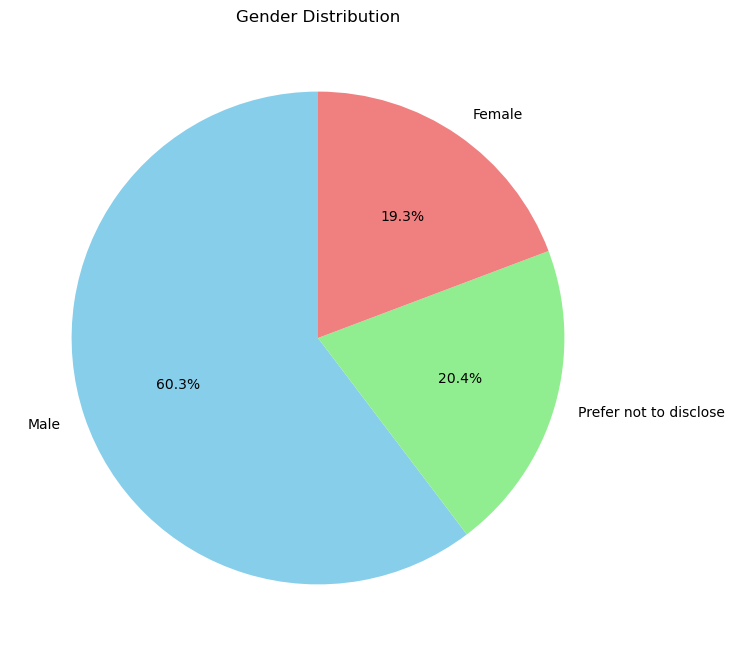

In [58]:
#creating a piechart for gender analysis
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

# Adding title
plt.title('Gender Distribution')

# Show the plot
plt.show()

In [59]:
#number of male rider/number of female rider
935854/298784

3.132209221377316

In [60]:
#User type analysis
#Count the occurence of each user types (usertype) to understand the demographics of bike user.
user_type_counts = df5['usertype'].value_counts()
user_type_counts

usertype
Subscriber    1234339
Customer       317151
Dependent           4
Name: count, dtype: int64

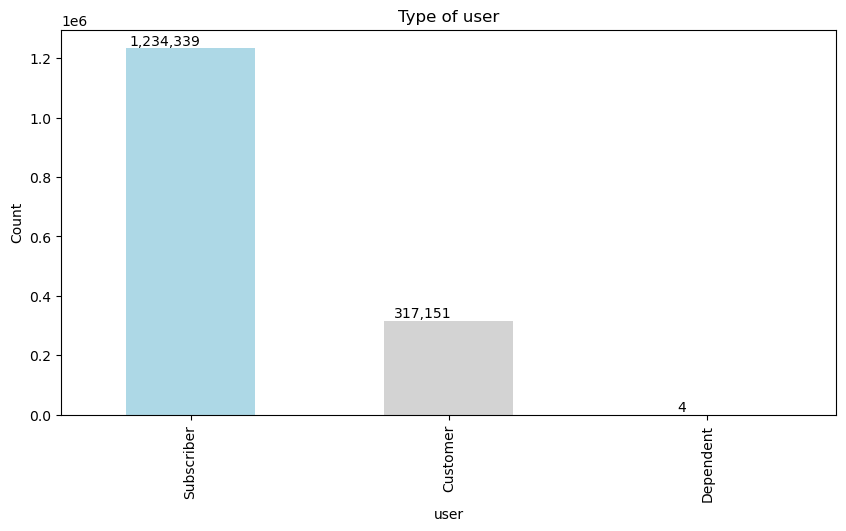

In [61]:
# Generating bar graph for user type analysis

# Create a bar plot for user type analysis with light blue, light red, and light orange colors
plt.figure(figsize=(10, 5))
bars = user_type_counts.plot(kind='bar', color=['lightblue', 'lightgray', 'lightcoral'])

# Add labels on top of each bar
for bar, count in zip(bars.patches, user_type_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 10000, f'{count:,}', ha='center', color='black')

# Set plot title and labels
plt.title('Type of user')
plt.xlabel('user')
plt.ylabel('Count')

# Show the plot
plt.show()


In [62]:
#Adding a column 'day_of_week' to know about the most popular day
# Sample DataFrame creation (replace this with your actual DataFrame)
# data = {'day_of_week': ['Tuesday', 'Monday', 'Friday', 'Saturday', 'Wednesday'],
#         'usertype': ['customer', 'subscriber', 'subscriber', 'customer', 'customer']}
# df5 = pd.DataFrame(data)

# In df5 'start_time' is the column containing date information
df5['start_time'] = pd.to_datetime(df5['start_time'])

# Create a new column 'day_of_week' with values ranging from Monday (0) to Sunday (6)
df5['day_of_week'] = df5['start_time'].dt.dayofweek

# Mapping numeric day_of_week values to corresponding day names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df5['day_of_week'] = df5['day_of_week'].map(day_mapping)

# Display the updated DataFrame with the new 'day_of_week' column
df5.head()

trip_id          start_time            end_time  bikeid  tripduration  \
0  13518905 2017-03-31 23:59:07 2017-04-01 00:13:24    5292           857   
1  13518904 2017-03-31 23:56:25 2017-04-01 00:00:21    4408           236   
2  13518903 2017-03-31 23:55:33 2017-04-01 00:01:21     696           348   
3  13518902 2017-03-31 23:54:46 2017-03-31 23:59:34    4915           288   
4  13518901 2017-03-31 23:53:33 2017-04-01 00:00:28    4247           415   

   from_station_id            from_station_name  to_station_id  \
0               66         Clinton St & Lake St            171   
1              199       Wabash Ave & Grand Ave             26   
2              520   Greenview Ave & Jarvis Ave            432   
3              110        Dearborn St & Erie St            142   
4              327  Sheffield Ave & Webster Ave            331   

                 to_station_name    usertype  gender   id  \
0          May St & Cullerton St  Subscriber    Male   66   
1       McClurg Ct & Illinois St  Subscriber    Male  199   
2            Clark St & Lunt Ave  Subscriber  Female  520   
3           McClurg Ct & Erie St  Subscriber    Male  110   
4  Halsted St & Blackhawk St (*)  Subscriber  Female  327   

                          name     city   latitude  longitude  dpcapacity  \
0         Clinton St & Lake St  Chicago  41.885637 -87.641823          23   
1       Wabash Ave & Grand Ave  Chicago  41.890912 -87.626804          15   
2   Greenview Ave & Jarvis Ave  Chicago  42.015962 -87.668570          23   
3        Dearborn St & Erie St  Chicago  41.893992 -87.629318          23   
4  Sheffield Ave & Webster Ave  Chicago  41.921540 -87.653818          19   

          online_date day_of_week  
0 2013-06-25 12:21:32      Friday  
1 2013-08-08 12:26:15      Friday  
2 2016-05-24 15:41:28      Friday  
3 2013-07-18 16:46:48      Friday  
4 2013-09-23 15:05:38      Friday

In [63]:
#What is the average number of rides taken by male and females on a daily basis?

# df5 has 'day_of_week' and 'gender' column
# Convert 'day_of_week' column to categorical with a custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df5['day_of_week'] = pd.Categorical(df5['day_of_week'], categories=day_order, ordered=True)

# Drop rows with 'prefer not to say' gender
df5 = df5[df5['gender'] != 'Prefer not to disclose']

# Group by 'day_of_week' and 'gender', calculate the average number of rides
grouped_data = df5.groupby(['day_of_week', 'gender']).size().reset_index(name='ride_count')
average_rides = grouped_data.groupby(['day_of_week', 'gender'])['ride_count'].mean().reset_index()

average_rides

day_of_week  gender  ride_count
0       Monday  Female     45051.0
1       Monday    Male    147279.0
2      Tuesday  Female     48352.0
3      Tuesday    Male    163171.0
4    Wednesday  Female     44478.0
5    Wednesday    Male    154047.0
6     Thursday  Female     44663.0
7     Thursday    Male    152905.0
8       Friday  Female     43005.0
9       Friday    Male    148236.0
10    Saturday  Female     37236.0
11    Saturday    Male     87500.0
12      Sunday  Female     35999.0
13      Sunday    Male     82716.0

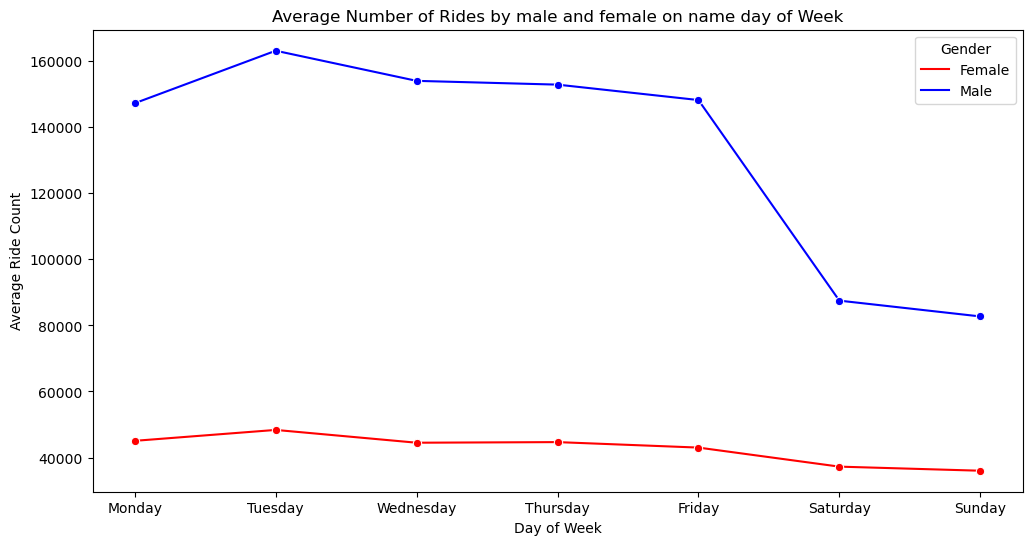

In [64]:
# Create a line chart using seaborn with separate lines for 'Male' and 'Female'
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week', y='ride_count', hue='gender', data=average_rides, marker='o',
             palette={'Male': 'blue', 'Female': 'red'})

# Setting plot labels and title
plt.title('Average Number of Rides by male and female on name day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Count')

# Displaying the legend
plt.legend(title='Gender')

# Displaying the plot
plt.show()

In [65]:
#What is the weekly average ride length of a male or female?

# Convert 'day_of_week' column to categorical with a custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Use the .loc accessor to modify the original DataFrame
df5.loc[:, 'day_of_week'] = pd.Categorical(df5['day_of_week'], categories=day_order, ordered=True)

# Filter rows where gender is either 'Male' or 'Female'
filtered_data = df5[df5['gender'].isin(['Male', 'Female'])]

# Calculate the weekly average ride length for each gender
avg_ride_length_gender = filtered_data.groupby(['day_of_week', 'gender'])['tripduration'].mean().reset_index()

# Display the result
avg_ride_length_gender

day_of_week  gender  tripduration
0       Monday  Female    776.362522
1       Monday    Male    660.743208
2      Tuesday  Female    767.083016
3      Tuesday    Male    663.145651
4    Wednesday  Female    752.639170
5    Wednesday    Male    644.930735
6     Thursday  Female    744.969303
7     Thursday    Male    651.115045
8       Friday  Female    758.736891
9       Friday    Male    654.760827
10    Saturday  Female    861.220700
11    Saturday    Male    756.201291
12      Sunday  Female    850.962582
13      Sunday    Male    752.379902

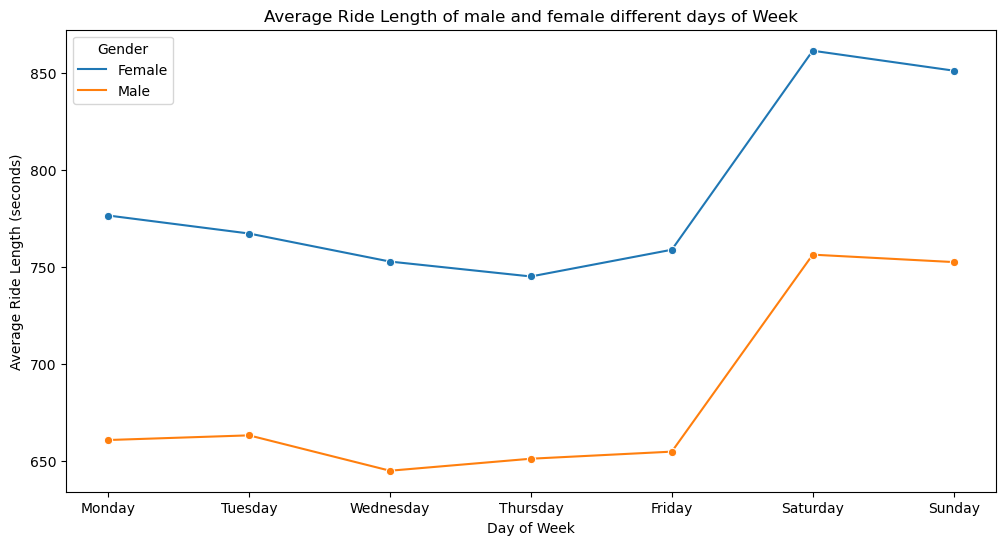

In [66]:
# ploting the  average ride length of a male and female on line chart
# Convert 'day_of_week' column to categorical with a custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Use the .loc accessor to modify the original DataFrame
df5.loc[:, 'day_of_week'] = pd.Categorical(df5['day_of_week'], categories=day_order, ordered=True)

# Filter rows where gender is either 'Male' or 'Female'
filtered_data = df5[df5['gender'].isin(['Male', 'Female'])]

# Calculate the average ride length for each gender
avg_ride_length_gender = filtered_data.groupby(['day_of_week', 'gender'])['tripduration'].mean().reset_index()

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week', y='tripduration', hue='gender', data=avg_ride_length_gender, marker='o')

# Setting plot labels and title
plt.title('Average Ride Length of male and female different days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (seconds)')

# Displaying the legend
plt.legend(title='Gender')

# Displaying the plot
plt.show()

In [67]:
#What is the average number of rides taken by subscriber and customer  different days of week?

# df5 has 'day_of_week' and 'usertype' column
# Convert 'day_of_week' column to categorical with a custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df5.loc[:, 'day_of_week'] = pd.Categorical(df5['day_of_week'], categories=day_order, ordered=True)

# Drop rows with 'Dependent' usertype
df5 = df5[df5['usertype'] != 'Dependent']

# Group by 'day_of_week' and 'usertype', calculate the average number of rides
grouped_data = df5.groupby(['day_of_week', 'usertype']).size().reset_index(name='ride_count')
average_rides = grouped_data.groupby(['day_of_week', 'usertype'])['ride_count'].mean().reset_index()

average_rides

day_of_week    usertype  ride_count
0       Monday    Customer        99.0
1       Monday  Subscriber    192230.0
2      Tuesday    Customer        76.0
3      Tuesday  Subscriber    211447.0
4    Wednesday    Customer        61.0
5    Wednesday  Subscriber    198464.0
6     Thursday    Customer        85.0
7     Thursday  Subscriber    197483.0
8       Friday    Customer        55.0
9       Friday  Subscriber    191186.0
10    Saturday    Customer        61.0
11    Saturday  Subscriber    124673.0
12      Sunday    Customer        42.0
13      Sunday  Subscriber    118672.0

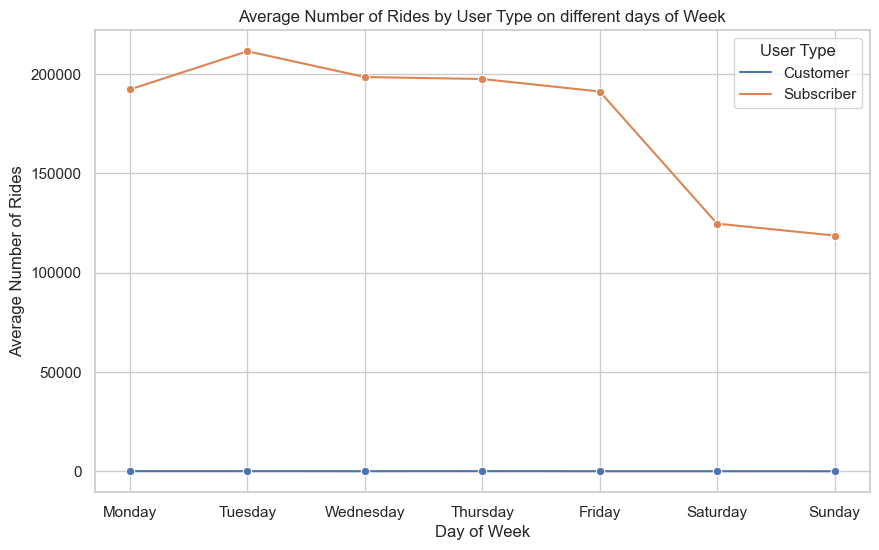

In [68]:
#creating line chart to see Average Number of Rides by User on different Day of Week
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rides, x='day_of_week', y='ride_count', hue='usertype', marker='o')

# Adding title and labels
plt.title('Average Number of Rides by User Type on different days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Rides')

# Display the legend
plt.legend(title='User Type')

# Show the plot
plt.show()

In [69]:
#What is the average ride length of a customer and subscriber on each name day of week?

# Convert 'day_of_week' column to categorical with a custom order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df5['day_of_week'] = pd.Categorical(df5['day_of_week'], categories=day_order, ordered=True)

# Filter rows where usertype is either 'Customer' or 'Subscriber'
filtered_data = df5[df5['usertype'].isin(['Customer', 'Subscriber'])]

# Calculate the weekly average ride length for each user type
avg_ride_length_usertype = filtered_data.groupby(['day_of_week', 'usertype'])['tripduration'].mean().reset_index()

# Display the result
avg_ride_length_usertype


day_of_week    usertype  tripduration
0       Monday    Customer    717.666667
1       Monday  Subscriber    687.812589
2      Tuesday    Customer    565.421053
3      Tuesday  Subscriber    686.948337
4    Wednesday    Customer    576.311475
5    Wednesday  Subscriber    669.090490
6     Thursday    Customer   1053.247059
7     Thursday  Subscriber    672.168156
8       Friday    Customer    712.127273
9       Friday  Subscriber    678.132494
10    Saturday    Customer   1236.016393
11    Saturday  Subscriber    787.334018
12      Sunday    Customer   1454.238095
13      Sunday  Subscriber    782.040776

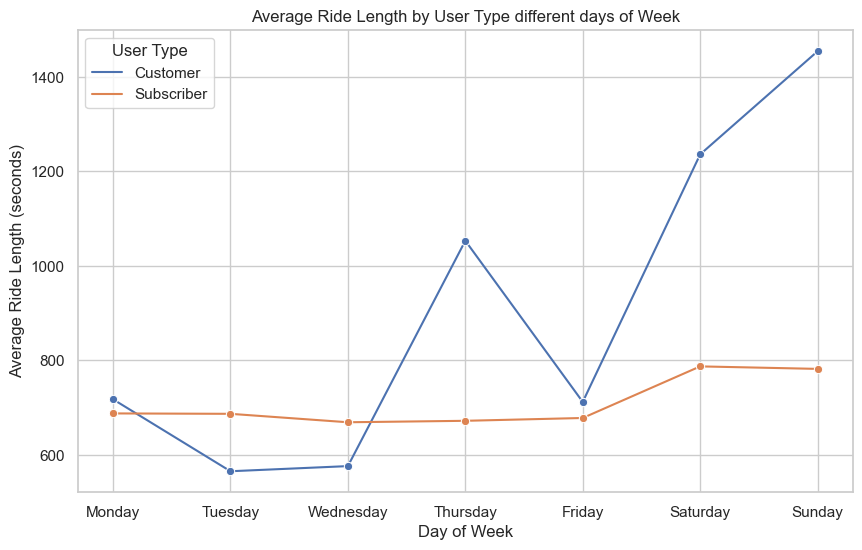

In [70]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_ride_length_usertype, x='day_of_week', y='tripduration', hue='usertype', marker='o')

# Adding title and labels
plt.title('Average Ride Length by User Type different days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Ride Length (seconds)')

# Display the legend
plt.legend(title='User Type')

# Show the plot
plt.show()

In [71]:
#Top Network Stations

In [72]:
# Find the number of unique stations
unique_stations = df4['name'].nunique()
unique_stations

582

In [73]:
# Find the top 10 stations from where riders start their ride
top_stations_start = df5['from_station_name'].value_counts().head(10)
top_stations_start

from_station_name
Clinton St & Washington Blvd    21826
Clinton St & Madison St         18365
Canal St & Adams St             17401
Kingsbury St & Kinzie St        13979
Canal St & Madison St           13954
Clinton St & Jackson Blvd       13549
Franklin St & Monroe St         12254
Columbus Dr & Randolph St       11728
Daley Center Plaza              10956
Michigan Ave & Washington St    10690
Name: count, dtype: int64

In [74]:
# Get the top 10 from_station_name and their counts
top_stations_start = df5['from_station_name'].value_counts()[:10].reset_index()
top_stations_start.columns = ['from_station_name', 'count']

# Create a bubble chart using plotly
fig = px.scatter(top_stations_start, x='from_station_name', y='count', size='count', color='count',
                 labels={'from_station_name': 'Station Name', 'count': 'Count'},
                 title='Top 10 From Stations - Bubble Chart')
# Show the plot
fig.show()

In [75]:
#to check traffic generated for our bike network from the top 10 start stations
df5['from_station_name'].value_counts()[:10].sum()/df5.shape[0]
#Above we can see that our top ten start stations account for ~ 11.72% of all of the traffic start points on our bike network.

0.11720234498644942

In [76]:
# Find the top 10 stations where riders terminate their ride
top_stations_end = df5['to_station_name'].value_counts().head(10)
top_stations_end

to_station_name
Clinton St & Washington Blvd           20608
Clinton St & Madison St                20347
Canal St & Adams St                    16756
Kingsbury St & Kinzie St               13851
Canal St & Madison St                  13400
Clinton St & Jackson Blvd              13344
Michigan Ave & Washington St           11852
Franklin St & Monroe St                11461
Daley Center Plaza                     11043
Orleans St & Merchandise Mart Plaza     9688
Name: count, dtype: int64

In [77]:
# Get the top 10 from_station_name and their counts
top_stations_end = df5['to_station_name'].value_counts()[:10].reset_index()
top_stations_end.columns = ['to_station_name', 'count']

# Create a bubble chart using plotly
fig = px.scatter(top_stations_end, x='to_station_name', y='count', size='count', color='count',
                 labels={'to_station_name': 'Station Name', 'count': 'Count'},
                 title='Top 10 To Stations - Bubble Chart')
# Show the plot
fig.show()


In [78]:
#to check traffic generated for our bike network from the top 10 end stations
df5['to_station_name'].value_counts()[:10].sum()/df5.shape[0]
#Above we can see that our top ten end stations account for ~ 11.52% of all of the traffic end points on our bike network.

0.11529732698111343

In [79]:
#What are the top 5 stations where customers start their ride?
# Filter the DataFrame to include only rows where usertype is 'Customer'
customer_rides = df5[df5['usertype'] == 'Customer']

# Find the top 5 stations where customers started their ride
top_customer_stations_started = customer_rides['from_station_name'].value_counts().head(5)

top_customer_stations_started

from_station_name
Kingsbury St & Kinzie St         91
Clinton St & Madison St          77
Canal St & Madison St            20
Pine Grove Ave & Waveland Ave    10
Lake Shore Dr & Ohio St           9
Name: count, dtype: int64

In [80]:
# Plotting the bubble chart using plotly.graph_objects
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=top_customer_stations_started.index,  # Assuming the index is the station names
    y=top_customer_stations_started.values,
    mode='markers',
    marker=dict(
        size=top_customer_stations_started.values * 0.5,  # Adjust the size of the bubbles as needed
        color=top_customer_stations_started.values,
        colorscale='Viridis',  # Use a custom color scale
        colorbar=dict(title='Number of Rides'),  # Add a color bar
    ),
    text=top_customer_stations_started.values.astype(int),  # Add labels on the bubbles
))

# Add annotations for station names
for i, station in enumerate(top_customer_stations_started.index):
    fig.add_annotation(
        x=station,
        y=top_customer_stations_started[station],
        text=station,
        showarrow=False,
        font=dict(size=10),
    )

# Customize the layout
fig.update_layout(
    title='Top 5 Stations where Customers Started Their Ride',
    xaxis=dict(title='Station'),
    yaxis=dict(title='Number of Rides'),
)

# Show the plot
fig.show()

In [81]:
#What are the top 5 stations where customers end their ride?
# Filter the DataFrame to include only rows where usertype is 'Customer'
customer_rides = df5[df5['usertype'] == 'Customer']

# Find the top 5 stations where customers ended their ride
top_customer_stations_ended = customer_rides['to_station_name'].value_counts().head(5)

top_customer_stations_ended

to_station_name
Clinton St & Madison St          98
Kingsbury St & Kinzie St         89
Columbus Dr & Randolph St         9
Pine Grove Ave & Waveland Ave     9
Lake Shore Dr & North Blvd        8
Name: count, dtype: int64

In [82]:
#plotting the top 5 stations on bubble chart
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Station': top_customer_stations_ended.index,
    'Frequency': top_customer_stations_ended.values
})

# Create a bubble chart using Plotly Express
fig = px.scatter(plot_data, x='Station', y='Frequency',
                 size='Frequency', title='Top 5 Stations where Customers End Their Ride',
                 labels={'Frequency': 'Number of Rides'},
                 size_max=50, color=plot_data['Frequency'])

# Show the plot
fig.show()

In [83]:
#What is the dpcapacity of city?
# Group by city and calculate the total dpcapacity for each city
dpcapacity_citywise = df5.groupby('city')['dpcapacity'].sum().reset_index()
dpcapacity_citywise 

city  dpcapacity
0   Chicago    27438514
1  Evanston      111540
2  Oak Park       72069

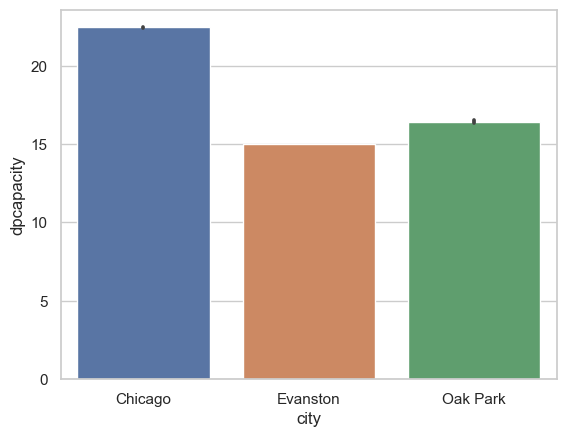

In [84]:
# ploting dpcapacity city wise
sns.barplot(x = 'city',y = 'dpcapacity',data = df5)

plt.show()

In [85]:
# What is the dpcapacity of the top 5 stations where customers start their ride
# Find the top 5 stations where customers start their ride
top_customer_stations_started = df5['from_station_name'].value_counts().head(5).index

# Filter df5 to include only rows where the 'from_station_name' is in the top 5 list
df_top_stations = df5[df5['from_station_name'].isin(top_customer_stations_started)]

# Group by station and calculate the total dpcapacity for each station
dpcapacity_top_customer_stations_started = df_top_stations.groupby('from_station_name')['dpcapacity'].sum().reset_index()
dpcapacity_top_customer_stations_started

from_station_name  dpcapacity
0           Canal St & Adams St      817847
1         Canal St & Madison St      376758
2       Clinton St & Madison St      569315
3  Clinton St & Washington Blvd      676606
4      Kingsbury St & Kinzie St      377433

In [86]:
# Sort the DataFrame by dpcapacity in descending order
dpcapacity_top_customer_stations_started = dpcapacity_top_customer_stations_started.sort_values(by='dpcapacity', ascending=False)


# Plotting for the top 5 stations where customers start their ride
plt.figure(figsize=(12, 6))
sns.barplot(x='from_station_name', y='dpcapacity', data=dpcapacity_top_customer_stations_started)
plt.xlabel('Start Station')
plt.ylabel('Total Dpcapacity')
plt.title('Top 5 Stations where Customers Start Their Ride')
plt.xticks(rotation=45)
plt.show()

In [87]:
# What is the dpcapacity of the top 5 stations where customers end their ride
# Find the top 5 stations where customers terminate their ride
top_customer_stations_ended = df5['to_station_name'].value_counts().head(5).index

# Filter df5 to include only rows where the 'to_station_name' is in the top 5 list
df_top_stations = df5[df5['to_station_name'].isin(top_customer_stations_ended)]

# Group by station and calculate the total dpcapacity for each station
dpcapacity_top_customer_stations_ended = df_top_stations.groupby('to_station_name')['dpcapacity'].sum().reset_index()
dpcapacity_top_customer_stations_ended

to_station_name  dpcapacity
0           Canal St & Adams St      432664
1         Canal St & Madison St      352903
2       Clinton St & Madison St      479255
3  Clinton St & Washington Blvd      520209
4      Kingsbury St & Kinzie St      341024

In [88]:
# Sort the DataFrame by dpcapacity in descending order
dpcapacity_top_customer_stations_ended = dpcapacity_top_customer_stations_ended.sort_values(by='dpcapacity', ascending=False)

# Plotting for the top 5 stations where customers terminate their ride
plt.figure(figsize=(12, 6))
sns.barplot(x='to_station_name', y='dpcapacity', data=dpcapacity_top_customer_stations_ended)
plt.xlabel('End Station')
plt.ylabel('Total Dpcapacity')
plt.title('Top 5 Stations where Customers Terminate Their Ride')
plt.xticks(rotation=45)
plt.show()

In [89]:
# Create a folium map for each station with respect to dpcapacity
mymap = folium.Map(location=[df4['latitude'].mean(), df4['longitude'].mean()], zoom_start=12)

# Add circle markers for each location with varying color and size based on dpcapacity
for index, row in df4.iterrows():
    color = 'green' if row['dpcapacity'] < 20 else 'orange' if row['dpcapacity'] < 30 else 'red'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['dpcapacity'],
        color=color,
         fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['name']} - Capacity: {row['dpcapacity']}",
    ).add_to(mymap)

# Display the map in Jupyter Notebook
mymap